In [1]:
import sys
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [3]:
%matplotlib inline

## Loading Files

 - Set up the environment variable
 - Load csv of each city

In [24]:
DIR_PATH =  os.getcwd()
DATA_PATH = os.path.join(DIR_PATH + os.sep, "data")
FRANCE_PATH = os.path.join(DATA_PATH + os.sep, "France")
LYON_PATH = os.path.join(FRANCE_PATH + os.sep, "Lyon" + os.sep)
PARIS_PATH = os.path.join(FRANCE_PATH + os.sep, "Paris" + os.sep)
BDX_PATH = os.path.join(FRANCE_PATH + os.sep, "Bordeaux" + os.sep)

In [33]:
lyon_listings

,Unnamed: 0,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
0,8882,23371068,Shared room,56952209,2016-02-01,90%,1.67,9.0,8.0,8.0,8.0,8.0,85.0,9.0,$15.00,69001,14
1,100,804619,Private room,4197478,2012-11-20,70%,0.14,9.0,10.0,9.0,9.0,7.0,88.0,9.0,NaN,69009,10
2,298,1858587,Entire home/apt,9434938,2013-10-15,NaN,0.17,9.0,9.0,9.0,9.0,8.0,93.0,9.0,$10.00,69001,3
3,6388,19619854,Entire home/apt,27690760,2015-02-13,NaN,3.10,10.0,10.0,10.0,10.0,10.0,98.0,9.0,NaN,69005,52
4,3865,13120423,Shared room,38911425,2015-07-19,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,10.0,$10.00,69001,1
5,3306,11550632,Private room,19010946,2014-07-28,NaN,0.12,10.0,8.0,10.0,10.0,8.0,80.0,10.0,NaN,69008,4
6,8626,22513837,Shared room,56952209,2016-02-01,90%,2.07,8.0,9.0,9.0,9.0,8.0,79.0,10.0,$15.00,69001,18
7,4102,13410100,Entire home/apt,40762367,2015-08-07,NaN,0.07,8.0,10.0,9.0,10.0,10.0,90.0,11.0,$20.00,69001,2
8,2044,8040759,Private room,41802967,2015-08-18,NaN,0.11,10.0,9.0,10.0,10.0,9.0,85.0,12.0,NaN,69003,4
9,8557,22241590,Private room,162521900,2017-12-13,NaN,0.27,10.0,10.0,10.0,10.0,9.0,100.0,12.0,NaN,69007,3


In [32]:
bdx_listings = pd.read_csv(BDX_PATH+"clean_bdx_listing.csv", low_memory=False)
lyon_listings = pd.read_csv(LYON_PATH+"clean_lyon_listing.csv", low_memory=False)
paris_listings = pd.read_csv(PARIS_PATH+"clean_paris_listing.csv", low_memory=False)
#------------------
bdx_reviews = pd.read_csv(BDX_PATH+"reviews.csv", low_memory=False)
lyon_reviews = pd.read_csv(LYON_PATH+"reviews.csv", low_memory=False)
paris_reviews = pd.read_csv(PARIS_PATH+"reviewsp.csv", low_memory=False)

In [34]:
bdx_listings["price"] = pd.to_numeric(bdx_listings["price"])
lyon_listings["price"] = pd.to_numeric(lyon_listings["price"])
paris_listings["price"] = pd.to_numeric(paris_listings["price"])

bdx_listings.price = [x.strip('$') for x in bdx_listings.price]
bdx_listings.price = bdx_listings.price.apply(lambda x: x.replace(',',''))
lyon_listings.price = [x.strip('$') for x in lyon_listings.price]
lyon_listings.price = lyon_listings.price.apply(lambda x: x.replace(',',''))
paris_listings.price = [x.strip('$') for x in paris_listings.price]
paris_listings.price = paris_listings.price.apply(lambda x: x.replace(',',''))

AttributeError: 'float' object has no attribute 'strip'

## Price comparison between Paris, Lyon and Bordeaux

Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Cities')

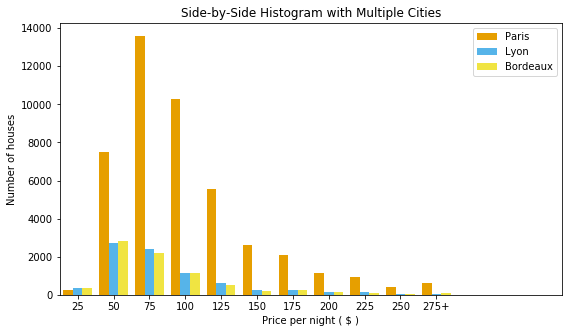

In [35]:
fig, ax = plt.subplots(figsize=(9, 5))
bins = np.arange(0,300,25)
xlabels = bins[1:].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 350])
plt.xticks(25 * np.arange(N_labels) + 12.5)
ax.set_xticklabels(xlabels)

x1 = price_paris = paris_listings['price']
x2 = price_lyon = lyon_listings['price']
x3 = price_bdx = bdx_listings['price']

colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['Paris', 'Lyon', 'Bordeaux']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3], bins = bins,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Price per night ( $ )')
plt.ylabel('Number of houses')
plt.title('Side-by-Side Histogram with Multiple Cities')

Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Cities')

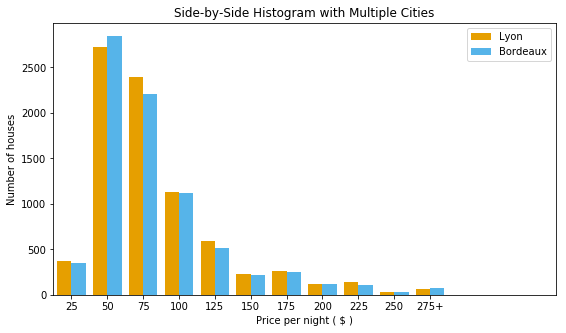

In [37]:
fig, ax = plt.subplots(figsize=(9, 5))
bins = np.arange(0,300,25)
xlabels = bins[1:].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 350])
plt.xticks(25 * np.arange(N_labels) + 12.5)
ax.set_xticklabels(xlabels)

x2 = price_lyon = lyon_listings['price']
x3 = price_bdx = bdx_listings['price']

colors = ['#E69F00', '#56B4E9']
names = ['Lyon', 'Bordeaux']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x2, x3], bins = bins,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Price per night ( $ )')
plt.ylabel('Number of houses')
plt.title('Side-by-Side Histogram with Multiple Cities')